## Pratilipi Assignment, Vinayak Joshi

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, merge
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import model_to_dot

from keras.layers.merge import dot
from keras.models import Model
from keras.layers import Dropout, Flatten,Activation,Input,Embedding
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import tensorflow as tf
import random as rn

import numpy as np  
import os                   
from random import shuffle  

import gc

In [158]:
df = pd.read_csv(r'/kaggle/input/pratilipitest/metadata.csv')

In [159]:
df2 = pd.read_csv(r'/kaggle/input/pratilipitest/user-interactions.csv')

In [160]:
train = df.merge(df2, on="pratilipi_id", how = 'right').fillna(0)

In [161]:
del df2;  gc.collect()

32771

In [162]:
train.describe()

,author_id,pratilipi_id,reading_time,Unnamed: 0,user_id,read_percent
count,1.986169e+07,1.986169e+07,1.986169e+07,1.986169e+07,1.986169e+07,1.986169e+07
mean,-1.882182e+15,1.371457e+15,4.532089e+02,4.992419e+06,5.489075e+15,9.356443e+01
std,9.923882e+14,1.046042e+14,6.555155e+02,2.884281e+06,1.609967e+14,2.119431e+01
min,-4.566636e+15,-5.375941e+15,0.000000e+00,0.000000e+00,3.255388e+15,0.000000e+00
25%,-2.270332e+15,1.377786e+15,1.350000e+02,2.497602e+06,5.506792e+15,1.000000e+02
50%,-2.270332e+15,1.377786e+15,3.830000e+02,4.992862e+06,5.506792e+15,1.000000e+02
75%,-2.270332e+15,1.377786e+15,6.290000e+02,7.483638e+06,5.506792e+15,1.000000e+02
max,0.000000e+00,1.377786e+15,7.898300e+04,9.999999e+06,5.506792e+15,2.400000e+03


In [163]:
df = train.head(20000)

In [164]:
del train;  gc.collect()

69

In [165]:
df['user_id'].unique()

array([5506791963854965, 5506791979071996, 5506791980256358, ...,
       5506791993550372, 5506791977740996, 5506791956186984])

In [166]:
len(df['user_id'].unique())

3881

In [167]:
df['pratilipi_id'].unique()

array([1377786220672965, 1377786219742624, 1377786217096334, ...,
       1377786225480924, 1377786225713584, 1377786222434182])

In [168]:
len(df['pratilipi_id'].unique())

8190

In [169]:
df['user_id'].isnull().sum()

0

In [170]:
df['read_percent'].isnull().sum()

0

In [171]:
df['pratilipi_id'].isnull().sum()

0

In [172]:
df['read_percent'].min() # minimum read percent

0.0

In [173]:
df['read_percent'].max() # maximum read percent

100.0

In [174]:
df['read_percent'].unique()

array([100.        ,  29.        ,  22.        ,  84.        ,
        34.        ,   2.        ,  90.        ,  94.        ,
        99.        ,  10.        ,  50.        ,  57.        ,
        15.        ,  25.        ,  28.        ,  75.        ,
         5.        ,  38.        ,  23.        ,  35.        ,
         6.        ,  58.        ,  60.        ,   9.        ,
        67.        ,  40.        ,  21.507437  ,  70.        ,
        86.        ,  77.        ,  17.        ,  79.        ,
        63.        ,  14.        ,  30.        ,  12.        ,
        64.        ,  42.        ,  88.        ,  93.        ,
         8.        ,  61.        ,  72.        ,  13.        ,
         0.        ,  66.        ,  81.        ,  69.        ,
        92.        ,   7.        ,  62.        ,  80.        ,
        47.        ,  49.        ,   4.        ,  37.        ,
        73.        ,  19.        ,  65.        ,  89.        ,
        21.        ,  56.        ,  95.        ,  43.  

In [175]:
df['category_name'].unique()

array(['novels', 'romance', 'moral-inspiring', 0, 'suspense',
       'relegion-and-spiritual', 'mythology', 'politics', 'family',
       'Pratilipi-Awards-Hindi', 'women', 'horror',
       'action-and-adventure', 'shortstories', 'social', 'drama',
       'webseries', 'entertainment', 'Serieswriting', 'swahindi2',
       'The-Chat-Story', 'fantasy', 'premkamahina', 'comedy', 'life',
       'crime', 'krishi-jeevan', 'Indiawale', 'Parytan', 'murder-mystery',
       'erotica', 'crime-lekhan', 'Pratilipi-kalamkar-samman',
       'detective', 'experiences-and-memories', 'children', 'translation',
       'Horror-Marathon', 'science-fiction', 'Radio-Fiction',
       'short-story-challenge', 'health-and-wellness', 'pratilipi-kids'],
      dtype=object)

In [176]:
df.category_name = df.category_name.astype('category').cat.codes.values

In [177]:
df['user_id'].value_counts(ascending=True)

5506791956186984      1
5506791972554922      1
5506791964209323      1
5506791969492153      1
5506791954925616      1
                   ... 
5506791995344856     89
5506791961896093     97
5506791960530936     99
5506791993573651    114
5506791971308018    360
Name: user_id, Length: 3881, dtype: int64

In [178]:
df['pratilipi_id'].unique()

array([1377786220672965, 1377786219742624, 1377786217096334, ...,
       1377786225480924, 1377786225713584, 1377786222434182])

In [179]:
index=list(df['user_id'].unique())
columns=list(df['pratilipi_id'].unique())
index=sorted(index)
columns=sorted(columns)

util_df=pd.pivot_table(data=df,values='read_percent',index='user_id',columns='pratilipi_id')

In [180]:
util_df

pratilipi_id,-841612888729912,-821302225365304,-820284227938616,-685415564929336,-652143488231736,-597784221542712,-582810870311224,-430765825681720,-392726584846648,-280096576727352,...,1377786228368922,1377786228368929,1377786228368974,1377786228369018,1377786228369089,1377786228369099,1377786228369109,1377786228369115,1377786228369118,1377786228369138
user_id,,,,,,,,,,,,,,,,,,,,,
3270953179456164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3352707533808292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3392148702405284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3395882891780772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3405191098311332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5506791996685286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5506791996685288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5506791996685309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
util_df.fillna(0)

pratilipi_id,-841612888729912,-821302225365304,-820284227938616,-685415564929336,-652143488231736,-597784221542712,-582810870311224,-430765825681720,-392726584846648,-280096576727352,...,1377786228368922,1377786228368929,1377786228368974,1377786228369018,1377786228369089,1377786228369099,1377786228369109,1377786228369115,1377786228369118,1377786228369138
user_id,,,,,,,,,,,,,,,,,,,,,
3270953179456164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3352707533808292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3392148702405284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3395882891780772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3405191098311332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5506791996685286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5506791996685288,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5506791996685309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [182]:
users = df.user_id.unique()
books = df.pratilipi_id.unique()

userid2idx = {o:i for i,o in enumerate(users)}
booksid2idx = {o:i for i,o in enumerate(books)}

In [183]:
df['user_id'] = df['user_id'].apply(lambda x: userid2idx[x])
df['pratilipi_id'] = df['pratilipi_id'].apply(lambda x: booksid2idx[x])
split = np.random.rand(len(df)) < 0.75
train = df[split]
valid = df[~split]
print(train.shape , valid.shape)

(14897, 10) (5103, 10)


In [184]:
n_books=len(df['pratilipi_id'].unique())
n_users=len(df['user_id'].unique())
n_latent_factors = 64

In [185]:
user_input = Input(shape=(1,),name='user_input',dtype='int64')

In [186]:
user_embedding = Embedding(n_users,n_latent_factors,name='user_embedding')(user_input)

In [187]:
user_vec =Flatten(name='FlattenUsers')(user_embedding)

In [188]:
book_input=Input(shape=(1,),name='book_input',dtype='int64')
book_embedding=Embedding(n_books,n_latent_factors,name='book_embedding')(book_input)
book_vec=Flatten(name='Flattenbooks')(book_embedding)

In [189]:
sim = dot([user_vec,book_vec],name='Simalarity-Dot-Product',axes=1)
model = keras.models.Model([user_input, book_input],sim)

In [190]:
model.compile(optimizer=Adam(lr=1e-4), loss='mse')

In [193]:
train.shape
batch_size=128
epochs=500

In [194]:
History = model.fit([train.user_id,train.pratilipi_id],train.read_percent, batch_size=batch_size,
                              epochs =epochs, validation_data = ([valid.user_id,valid.pratilipi_id],valid.read_percent),
                              verbose = 1)

Epoch 1/500
117/117 [==============================] - 0s 3ms/step - loss: 5705.9219 - val_loss: 6789.1836
Epoch 2/500
117/117 [==============================] - 0s 3ms/step - loss: 5686.2251 - val_loss: 6776.6782
Epoch 3/500
117/117 [==============================] - 0s 3ms/step - loss: 5666.5513 - val_loss: 6764.1411
Epoch 4/500
117/117 [==============================] - 0s 3ms/step - loss: 5646.8457 - val_loss: 6751.5698
Epoch 5/500
117/117 [==============================] - 0s 3ms/step - loss: 5627.1099 - val_loss: 6738.9902
Epoch 6/500
117/117 [==============================] - 0s 3ms/step - loss: 5607.3726 - val_loss: 6726.4126
Epoch 7/500
117/117 [==============================] - 0s 3ms/step - loss: 5587.6099 - val_loss: 6713.7959
Epoch 8/500
117/117 [==============================] - 0s 3ms/step - loss: 5567.8726 - val_loss: 6701.1924
Epoch 9/500
117/117 [==============================] - 0s 3ms/step - loss: 5548.1055 - val_loss: 6688.5439
Epoch 10/500
117/117 [===============

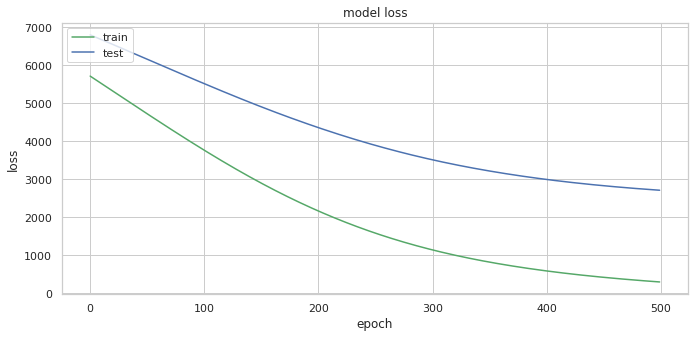

In [195]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
import matplotlib.pyplot as plt
plt.plot(History.history['loss'] , 'g')
plt.plot(History.history['val_loss'] , 'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

## Neural Network Model

In [196]:
n_latent_factors=5
n_books=len(df['pratilipi_id'].unique())
n_users=len(df['user_id'].unique())

In [197]:
user_input=Input(shape=(1,),name='user_input',dtype='int64')
user_embedding=Embedding(n_users,n_latent_factors,name='user_embedding')(user_input)
user_vec=Flatten(name='FlattenUsers')(user_embedding)
user_vec=Dropout(0.40)(user_vec)

In [198]:
book_input=Input(shape=(1,),name='book_input',dtype='int64')
book_embedding=Embedding(n_books,n_latent_factors,name='book_embedding')(book_input)
book_vec=Flatten(name='Flattenbooks')(book_embedding)
book_vec=Dropout(0.40)(book_vec)

In [199]:
sim=dot([user_vec,book_vec],name='Simalarity-Dot-Product',axes=1)

In [200]:
nn_inp=Dense(96,activation='LeakyReLU')(sim)
nn_inp=Dropout(0.3)(nn_inp)
nn_inp=BatchNormalization()(nn_inp)
nn_inp=Dense(1,activation='LeakyReLU')(nn_inp)
nn_model = keras.models.Model([user_input, book_input],nn_inp)
nn_model.summary()

Model: "model_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
book_input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 5)         19405       user_input[0][0]                 
__________________________________________________________________________________________________
book_embedding (Embedding)      (None, 1, 5)         40950       book_input[0][0]                 
___________________________________________________________________________________________

In [201]:
nn_model.compile(optimizer=Adam(lr=1e-3), loss='mse')

In [202]:
batch_size=128
epochs=100

In [203]:
History = nn_model.fit([train.user_id,train.pratilipi_id],train.read_percent, batch_size=batch_size,
                              epochs =epochs, validation_data = ([valid.user_id,valid.pratilipi_id],valid.read_percent),
                              verbose = 1)

Epoch 1/100
117/117 [==============================] - 2s 6ms/step - loss: 8239.7539 - val_loss: 7821.6992
Epoch 2/100
117/117 [==============================] - 0s 4ms/step - loss: 7085.5537 - val_loss: 6245.8130
Epoch 3/100
117/117 [==============================] - 0s 4ms/step - loss: 5173.2783 - val_loss: 4174.3389
Epoch 4/100
117/117 [==============================] - 0s 4ms/step - loss: 3103.0662 - val_loss: 2210.8496
Epoch 5/100
117/117 [==============================] - 0s 4ms/step - loss: 1543.8289 - val_loss: 1031.6467
Epoch 6/100
117/117 [==============================] - 0s 4ms/step - loss: 735.8557 - val_loss: 733.8768
Epoch 7/100
117/117 [==============================] - 0s 4ms/step - loss: 441.6093 - val_loss: 548.5469
Epoch 8/100
117/117 [==============================] - 0s 4ms/step - loss: 323.9069 - val_loss: 380.6150
Epoch 9/100
117/117 [==============================] - 0s 4ms/step - loss: 285.0428 - val_loss: 343.2672
Epoch 10/100
117/117 [=======================

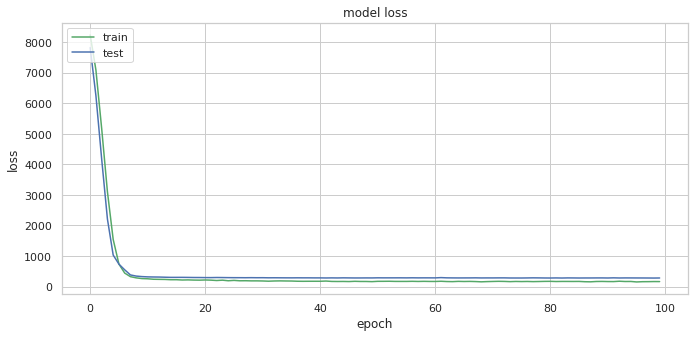

In [209]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
import matplotlib.pyplot as plt
plt.plot(History.history['loss'] , 'g')
plt.plot(History.history['val_loss'] , 'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()